# Содержание

1. Изучение данных из файлов  
2. Подготовка данных  
3. Анализ данных  
4. Проверка гипотез  
5. Общий вывод

# Определение перспективного тарифа для телеком-компании 
На основании небольшой выборки клиентов оператора сотовой связи необходимо сделать предварительный анализ тарифов. В нашем  распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# 1. Изучение данных из файлов <a class="anchor" id="first-bullet"></a>

Открываем данные:

In [67]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy import stats as st
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

try:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv',index_col=0)
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')

except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv',index_col=0)
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

Предпросмотр по порядку:

In [68]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [69]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Вывод по файлу calls:** 
- пропущенных значений нет;
- дата звонка задана в текстовом формате, а не в формате даты - **ИСПРАВИТЬ ДАЛЕЕ**

In [70]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [71]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


**Вывод по файлу internet:** 
- пропущенных значений нет;
- дата сессий задана в текстовом формате, а не в формате даты - **ИСПРАВИТЬ ДАЛЕЕ**

In [72]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [73]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Вывод по файлу messages:** 
- пропущенных значений нет;
- дата сообщений задана в текстовом формате, а не в формате даты - **ИСПРАВИТЬ ДАЛЕЕ**

In [74]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [75]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


**Вывод по файлу messages:** 
- пропущенных значений нет;
- несоответствий форматирования нет

In [76]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [77]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


Проверим единообразие в оформлении названий городов, поскольку городов немного, можем проверить "вручную":

In [78]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

**Вывод по файлу users:** 
- пропущенные значения в столбце отказа от тарифа;
- даты reg_date в текстовом формате - **ИСПРАВИТЬ ДАЛЕЕ**;
- список городов корректен, частичных дублирований / ошибок нет

**1.1. Общие выводы по разделу:** <a class="anchor" id="first-zero-bullet"></a>
- в целом набор данных подготовлен корректно, пропущенных значений нет (за исключением даты отказа от тарифа, но это и логично: не все пользователи будут отказываться от тарифа);
- необходимо перевести даты в соответствующий формат.

# 2. Подготовка данных <a class="anchor" id="second-bullet"></a>

- Приведем данные к нужным типам;
- Найдем и исправим ошибки в данных, если они есть.

Нулевые значения ошибками не являются.

Как было отмечено ранее, исправим данные на формат дат и проверим:

In [79]:
for table in [calls, internet, messages, users]:
    for col in table:
        if 'date' in col:
            table[col] = pd.to_datetime(table[col], format='%Y-%m-%d')
            print(f"Столбец {table[col].name}, тип данных: {table[col].dtype}")

Столбец call_date, тип данных: datetime64[ns]
Столбец session_date, тип данных: datetime64[ns]
Столбец message_date, тип данных: datetime64[ns]
Столбец churn_date, тип данных: datetime64[ns]
Столбец reg_date, тип данных: datetime64[ns]


Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

Округлим значения продолжительности разговоров в большую сторону:

In [80]:
calls['call_month'] = calls['call_date'].dt.month
calls['duration'] = np.ceil(calls['duration'])
calls_stacked  = calls.groupby(['user_id','call_month']).agg({'id':'count', 'duration':'sum'}).reset_index()
calls_stacked.columns = ['user_id','month', 'num_calls', 'len_calls']
calls_stacked.head()

,user_id,month,num_calls,len_calls
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


**Количество отправленных сообщений по месяцам**

In [81]:
messages['message_month'] = messages['message_date'].dt.month
messages_stacked  = messages.groupby(['user_id', 'message_month']).agg({'id':'count'}).reset_index()
messages_stacked.columns = ['user_id','month','num_messages']
messages_stacked.head()

,user_id,month,num_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


**Объем израсходованного интернет-трафика по месяцам**

Здесь переведем значения трафика в гигабайты и округлим до ближайшего верхнего значения:

In [82]:
internet['int_month'] = internet['session_date'].dt.month
internet_stacked  = internet.groupby(['user_id', 'int_month']).agg({'mb_used':'sum'}).reset_index()
internet_stacked.columns = ['user_id','month','vol_used']
internet_stacked['vol_used'] = np.ceil(internet_stacked['vol_used']/1000)
internet_stacked.head()

,user_id,month,vol_used
0,1000,5,3.0
1,1000,6,24.0
2,1000,7,15.0
3,1000,8,15.0
4,1000,9,15.0


**Помесячная выручка с каждого пользователя**

In [83]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


- вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
- остаток умножьте на значение из тарифного плана; 
- прибавьте абонентскую плату, соответствующую тарифному плану.

Создадим объединенную таблицу user_stats:

In [84]:
user_stats = calls_stacked.merge(messages_stacked, how='outer')
user_stats = user_stats.merge(internet_stacked, how='outer')
user_stats = user_stats.merge(users, how='outer')
user_stats_grouped = user_stats.pivot_table(index=['user_id','month'], values=['num_calls', 
                                                                     'len_calls', 
                                                                     'num_messages',
                                                                     'vol_used'], aggfunc=['sum'])

user_stats_grouped.columns = ['sum_len','sum_calls','sum_mess','sum_vol']
user_stats_grouped.head()

sum_len  sum_calls  sum_mess  sum_vol
user_id month                                       
1000    5.0      159.0       22.0      22.0      3.0
        6.0      172.0       43.0      60.0     24.0
        7.0      340.0       47.0      75.0     15.0
        8.0      408.0       52.0      81.0     15.0
        9.0      466.0       58.0      57.0     15.0

Подтянем данные по тарифам из таблиц с пользователями и тарифами:

In [85]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs = tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [86]:
#промежуточная таблица
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
user_tariffs = users[['user_id','tariff']]
user_stats_grouped = user_stats_grouped.reset_index().merge(user_tariffs, on=['user_id'], how='outer')
user_stats_grouped = user_stats_grouped.merge(tariffs, how='outer')

In [87]:
#промежуточная таблица
user_stats_grouped['paid_call_len'] = user_stats_grouped['sum_len'] - user_stats_grouped['minutes_included']
user_stats_grouped['paid_num_mes'] = user_stats_grouped['sum_mess'] - user_stats_grouped['messages_included']
user_stats_grouped['paid_vol_int'] = user_stats_grouped['sum_vol'] - user_stats_grouped['gb_per_month_included']
user_stats_grouped.head()

,user_id,month,sum_len,sum_calls,sum_mess,sum_vol,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,paid_call_len,paid_num_mes,paid_vol_int
0,1000,5.0,159.0,22.0,22.0,3.0,ultra,1000,30.0,3000,1950,150,1,1,-2841.0,-978.0,-27.0
1,1000,6.0,172.0,43.0,60.0,24.0,ultra,1000,30.0,3000,1950,150,1,1,-2828.0,-940.0,-6.0
2,1000,7.0,340.0,47.0,75.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,-2660.0,-925.0,-15.0
3,1000,8.0,408.0,52.0,81.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,-2592.0,-919.0,-15.0
4,1000,9.0,466.0,58.0,57.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,-2534.0,-943.0,-15.0


Создадим функцию get_revenue для подсчета выручки: она проверяет баланс минут / сообщений / объема интернет трафика по тарифу и в случае, если статья баланса неотрицательна, т.к. пользователь превысил лимит, складывает это значение с абонентской платой. В случае, если баланс был отрицательным по всем пунктам, вернется только сумма чистой абонентской платы.

In [88]:
def get_revenue(df):
    rev_calls = 0
    rev_mess = 0
    rev_int = 0

    if df[14] > 0:
        rev_calls = df[14] * df[13]
    if df[15] > 0:
        rev_mess = df[15] * df[12]
    if df[16] > 0:
        rev_int = df[16] * df[11]
    return rev_calls + rev_mess + rev_int + df[10]

user_stats_grouped['user_revenue'] = user_stats_grouped.apply(get_revenue, axis=1).round(decimals=2)
user_stats_grouped.head()

,user_id,month,sum_len,sum_calls,sum_mess,sum_vol,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,paid_call_len,paid_num_mes,paid_vol_int,user_revenue
0,1000,5.0,159.0,22.0,22.0,3.0,ultra,1000,30.0,3000,1950,150,1,1,-2841.0,-978.0,-27.0,1950.0
1,1000,6.0,172.0,43.0,60.0,24.0,ultra,1000,30.0,3000,1950,150,1,1,-2828.0,-940.0,-6.0,1950.0
2,1000,7.0,340.0,47.0,75.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,-2660.0,-925.0,-15.0,1950.0
3,1000,8.0,408.0,52.0,81.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,-2592.0,-919.0,-15.0,1950.0
4,1000,9.0,466.0,58.0,57.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,-2534.0,-943.0,-15.0,1950.0


Сократим количество столбцов и сформируем новую таблицу:

In [89]:
user_stats_revenue = user_stats_grouped[['user_id', 'month', 'sum_len', 'sum_mess','sum_vol', 'tariff', 'user_revenue']]
user_stats_revenue.head()

,user_id,month,sum_len,sum_mess,sum_vol,tariff,user_revenue
0,1000,5.0,159.0,22.0,3.0,ultra,1950.0
1,1000,6.0,172.0,60.0,24.0,ultra,1950.0
2,1000,7.0,340.0,75.0,15.0,ultra,1950.0
3,1000,8.0,408.0,81.0,15.0,ultra,1950.0
4,1000,9.0,466.0,57.0,15.0,ultra,1950.0


In [90]:
user_stats_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id         3216 non-null int64
month           3214 non-null float64
sum_len         3214 non-null float64
sum_mess        3214 non-null float64
sum_vol         3214 non-null float64
tariff          3216 non-null object
user_revenue    3216 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 201.0+ KB


Из необязательного: месяцы в таблице указаны в формате float. Для перевода в int мешают пропущенные значения. Т.к. пропущенных значений всего 2, мы можем удалить эти строки и привести месяцы к целочисленному формату.

In [91]:
user_stats_revenue.dropna(inplace=True)
user_stats_revenue['month'] = user_stats_revenue['month'].astype(int)
user_stats_revenue.head()

,user_id,month,sum_len,sum_mess,sum_vol,tariff,user_revenue
0,1000,5,159.0,22.0,3.0,ultra,1950.0
1,1000,6,172.0,60.0,24.0,ultra,1950.0
2,1000,7,340.0,75.0,15.0,ultra,1950.0
3,1000,8,408.0,81.0,15.0,ultra,1950.0
4,1000,9,466.0,57.0,15.0,ultra,1950.0


In [92]:
user_stats_revenue.sample(5)

,user_id,month,sum_len,sum_mess,sum_vol,tariff,user_revenue
1347,1073,10,461.0,34.0,17.0,smart,950.0
799,1397,12,232.0,0.0,24.0,ultra,1950.0
506,1289,10,1053.0,71.0,18.0,ultra,1950.0
2632,1373,2,2.0,38.0,21.0,smart,1750.0
2131,1248,5,105.0,0.0,3.0,smart,550.0


**2.1. Общие выводы по разделу:** <a class="anchor" id="second-zero-bullet"></a>

Мы получили таблицу user_stats_revenue, как и требовалось в нашем задании. Для этого потребовалось создание нескольких промежуточных таблиц с использованием сводных таблиц, слияния и написанной функции по расчету выручки.

# 3. Анализ данных <a class="anchor" id="third-bullet"></a>

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Разделим нашу таблицу на две, исходя из тарифов:

In [93]:
user_stats_revenue_ultra = user_stats_revenue[user_stats_revenue['tariff']=='ultra']
user_stats_revenue_smart = user_stats_revenue[user_stats_revenue['tariff']=='smart']

Для быстрой проверки просмотрим их описания методом describe:

In [94]:
user_stats_revenue_ultra.describe()

,user_id,month,sum_len,sum_mess,sum_vol,user_revenue
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,526.623350,49.363452,19.965482,2089.340102
std,140.694908,2.871762,317.606098,47.804457,10.100955,413.538753
min,1000.000000,1.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,284.000000,6.000000,12.000000,1950.000000
50%,1277.000000,9.000000,518.000000,38.000000,20.000000,1950.000000
75%,1381.000000,11.000000,752.000000,79.000000,27.000000,1950.000000
max,1495.000000,12.000000,1673.000000,224.000000,50.000000,4950.000000


In [95]:
user_stats_revenue_smart.describe()

,user_id,month,sum_len,sum_mess,sum_vol,user_revenue
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,33.384029,16.695828,1345.962764
std,146.119496,2.920316,190.313730,28.227876,5.877404,855.005567
min,1001.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,10.000000,13.000000,568.000000
50%,1239.000000,9.000000,422.000000,28.000000,17.000000,1150.000000
75%,1376.000000,11.000000,545.000000,51.000000,21.000000,1837.000000
max,1499.000000,12.000000,1435.000000,143.000000,39.000000,6970.000000


Каких-либо аномалий по результатам предварительной проверки не обнаружено. Заметно, что средняя выручка по пользователю выше на тарифе smart.

**Средние значения по категориям указаны в таблицах describe, так же выведем их отдельно в "печатном виде" и построим сравнительные диаграммы:**

In [96]:
mean_list_ultra, mean_list_smart = [],[]
print("Сводка средних значений по тарифу ULTRA")
for col in user_stats_revenue_ultra[['sum_len', 'sum_mess', 'sum_vol']]:
    print("Среднее значение категории", col, ":", user_stats_revenue_ultra[col].mean())
    mean_list_ultra.append(user_stats_revenue_ultra[col].mean())
    
print("") 
print("Сводка средних значений по тарифу SMART")
for col in user_stats_revenue_smart[['sum_len', 'sum_mess', 'sum_vol']]:
    print("Среднее значение категории", col, ":", user_stats_revenue_smart[col].mean())
    mean_list_smart.append(user_stats_revenue_smart[col].mean())

Сводка средних значений по тарифу ULTRA
Среднее значение категории sum_len : 526.6233502538071
Среднее значение категории sum_mess : 49.36345177664975
Среднее значение категории sum_vol : 19.965482233502538

Сводка средних значений по тарифу SMART
Среднее значение категории sum_len : 417.9349484073576
Среднее значение категории sum_mess : 33.384028712427096
Среднее значение категории sum_vol : 16.695827725437415


Отразим данные на сравнительных диаграммах. Горизонтальными линиями показаны лимиты данных по обоим тарифам. Красным цветом - лимит включенных данных для тарифа "smart", синим цветом для тарифа "ultra":

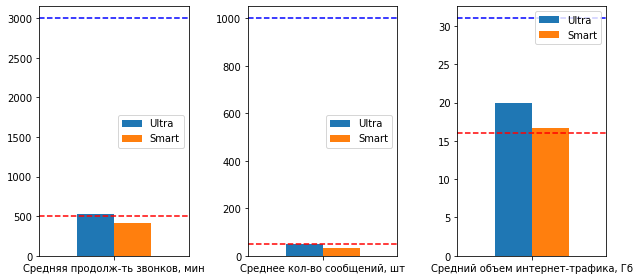

In [97]:
fig = plt.figure()

plotdata_calls = pd.DataFrame({
    "Ultra":mean_list_ultra[0],
    "Smart":mean_list_smart[0],
    }, 
    index=['Средняя продолж-ть звонков, мин']
)

plotdata_mess = pd.DataFrame({
    "Ultra":mean_list_ultra[1],
    "Smart":mean_list_smart[1],
    }, 
    index=['Среднее кол-во сообщений, шт']
)

plotdata_int = pd.DataFrame({
    "Ultra":mean_list_ultra[2],
    "Smart":mean_list_smart[2],
    }, 
    index=['Средний объем интернет-трафика, Гб']
)

ax1 = fig.add_subplot(131)
plotdata_calls.plot(kind="bar", rot=0, figsize=(9,4), ax=ax1)
ax1.axhline(500, color="red", linestyle="dashed")
ax1.axhline(3000, color="blue", linestyle="dashed")

ax2 = fig.add_subplot(132)
plotdata_mess.plot(kind="bar", rot=0, figsize=(9,4), ax=ax2)
ax2.axhline(50, color="red", linestyle="dashed")
ax2.axhline(1000, color="blue", linestyle="dashed")

ax3 = fig.add_subplot(133)
plotdata_int.plot(kind="bar", rot=0, figsize=(9,4), ax=ax3)
ax3.axhline(16, color="red", linestyle="dashed")
ax3.axhline(31, color="blue", linestyle="dashed")

fig.tight_layout()
plt.show()

Заметно, что лимиты на более дорогом тарифе "щедрые", но никто их не использует, по большей части. Пользователи более дешевых тарифов в среднем как раз приближаются к исчерпанию лимитов.

**Посчитаем дисперсию**

Для продолжительности звонков:

In [98]:
len_ultra = user_stats_revenue_ultra['sum_len']
len_smart = user_stats_revenue_smart['sum_len']
variance_len_ultra = np.var(len_ultra, ddof=1)
variance_len_smart = np.var(len_smart, ddof=1)
print("Дисперсия продолжительности звонков по тарифу ultra:",variance_len_ultra)
print("Дисперсия продолжительности звонков по тарифу smart:",variance_len_smart)

Дисперсия продолжительности звонков по тарифу ultra: 100873.63339730092
Дисперсия продолжительности звонков по тарифу smart: 36219.315784344246


Для количества сообщений:

In [99]:
mess_ultra = user_stats_revenue_ultra['sum_mess']
mess_smart = user_stats_revenue_smart['sum_mess']
variance_mess_ultra = np.var(mess_ultra, ddof=1)
variance_mess_smart = np.var(mess_smart, ddof=1)
print("Дисперсия количества сообщений по тарифу ultra:",variance_mess_ultra)
print("Дисперсия количества сообщений по тарифу smart:",variance_mess_smart)

Дисперсия количества сообщений по тарифу ultra: 2285.2661425446836
Дисперсия количества сообщений по тарифу smart: 796.8129584480083


Для объема интернет-трафика:

In [100]:
int_ultra = user_stats_revenue_ultra['sum_vol']
int_smart = user_stats_revenue_smart['sum_vol']
variance_int_ultra = np.var(int_ultra, ddof=1)
variance_int_smart = np.var(int_smart, ddof=1)
print("Дисперсия объема интернет-трафика по тарифу ultra:",variance_int_ultra)
print("Дисперсия объема интернет-трафика по тарифу smart:",variance_int_smart)

Дисперсия объема интернет-трафика по тарифу ultra: 102.02929511782392
Дисперсия объема интернет-трафика по тарифу smart: 34.54388294337805


**Посчитаем стандартное отклонение:**

Несмотря на то, что стандартное отклонение представлено в таблицах describe, посчитаем его вручную. По продолжительности звонков:

In [101]:
deviation_len_ultra = np.std(len_ultra)
deviation_len_smart = np.std(len_smart)
print("Станд.отклонение продолжительности звонков по тарифу ultra:",deviation_len_ultra)
print("Станд.отклонение продолжительности звонков по тарифу smart:",deviation_len_smart)

Станд.отклонение продолжительности звонков по тарифу ultra: 317.4448355497411
Станд.отклонение продолжительности звонков по тарифу smart: 190.27103471651867


Для количества сообщений:

In [102]:
deviation_mes_ultra = np.std(mess_ultra)
deviation_mes_smart = np.std(mess_smart)
print("Станд.отклонение количества сообщений по тарифу ultra:",deviation_mes_ultra)
print("Станд.отклонение количества сообщений по тарифу smart:",deviation_mes_smart)

Станд.отклонение количества сообщений по тарифу ultra: 47.780184966101714
Станд.отклонение количества сообщений по тарифу smart: 28.221542886898938


Для объема интернет-трафика:

In [103]:
deviation_int_ultra = np.std(int_ultra)
deviation_int_smart = np.std(int_smart)
print("Станд.отклонение объема интернет-трафика по тарифу ultra:",deviation_int_ultra)
print("Станд.отклонение объема интернет-трафика по тарифу smart:",deviation_int_smart)

Станд.отклонение объема интернет-трафика по тарифу ultra: 10.095826468253858
Станд.отклонение объема интернет-трафика по тарифу smart: 5.876085896527345


Все найденные значения совпадают с таблицей describe.

**Построим гистограммы по заданным параметрам (минуты разговора, количество сообщений и объём интернет-трафика):**

Гистограмма продолжительности разговоров по пользователям. Вертикальными линиями показаны лимиты данных по обоим тарифам. Красным цветом - лимит включенных данных для тарифа "smart", синим цветом для тарифа "ultra".

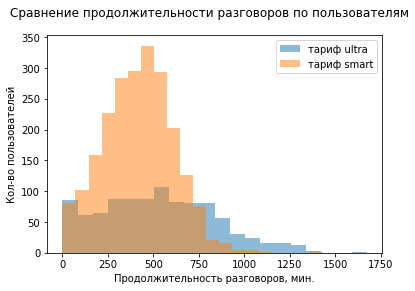

In [104]:
plt.hist(user_stats_revenue_ultra['sum_len'], bins=20, alpha=0.5, label='тариф ultra')
plt.hist(user_stats_revenue_smart['sum_len'], bins=20, alpha=0.5, label='тариф smart')
plt.xlabel('Продолжительность разговоров, мин.')
plt.ylabel('Кол-во пользователей')
plt.legend(loc='upper right')
plt.suptitle('Сравнение продолжительности разговоров по пользователям')
plt.show()

Та же гистограмма с линиями, отображающими лимиты:

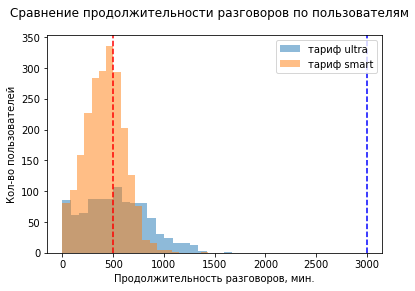

In [105]:
plt.hist(user_stats_revenue_ultra['sum_len'], bins=20, alpha=0.5, label='тариф ultra')
plt.hist(user_stats_revenue_smart['sum_len'], bins=20, alpha=0.5, label='тариф smart')
plt.xlabel('Продолжительность разговоров, мин.')
plt.ylabel('Кол-во пользователей')
plt.axvline(500, color="red", linestyle="dashed")
plt.axvline(3000, color="blue", linestyle="dashed")
plt.legend(loc='upper right')
plt.suptitle('Сравнение продолжительности разговоров по пользователям')
plt.show()

**Выводы:**
- Во-первых, заметно нормальное распределение (и более нормальное среди пользователей дешевого тарифа). 
- Во-вторых, заметно, что лимит на количество минут как раз приходится на медиану гистограммы. Т.е. большинство пользователей дешевого тарифа следят за соблюдением лимитов. 
- Пользователи дорогого тарифа даже не приближаются к лимиту по минутам... Медиана примерно на том же уровне, что и у пользователей более дешевого тарифа. То есть "наговаривают" минут все пользователи примерно одинаково.

Гистограмма количества сообщений по пользователям:

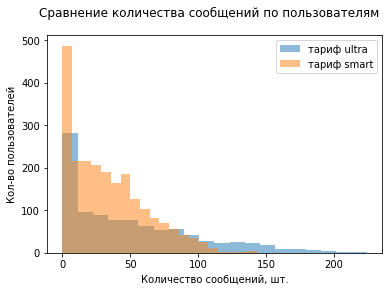

In [106]:
plt.hist(user_stats_revenue_ultra['sum_mess'], bins=20, alpha=0.5, label='тариф ultra')
plt.hist(user_stats_revenue_smart['sum_mess'], bins=20, alpha=0.5, label='тариф smart')
plt.xlabel('Количество сообщений, шт.')
plt.ylabel('Кол-во пользователей')
plt.legend(loc='upper right')
plt.suptitle('Сравнение количества сообщений по пользователям')
plt.show()

Та же гистограмма с линиями, отображающими лимиты:

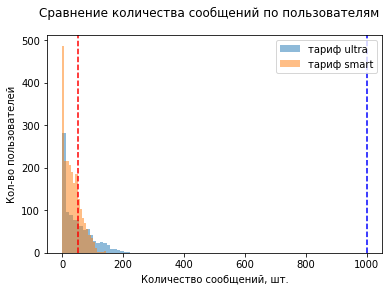

In [107]:
plt.hist(user_stats_revenue_ultra['sum_mess'], bins=20, alpha=0.5, label='тариф ultra')
plt.hist(user_stats_revenue_smart['sum_mess'], bins=20, alpha=0.5, label='тариф smart')
plt.xlabel('Количество сообщений, шт.')
plt.ylabel('Кол-во пользователей')
plt.axvline(50, color="red", linestyle="dashed")
plt.axvline(1000, color="blue", linestyle="dashed")
plt.legend(loc='upper right')
plt.suptitle('Сравнение количества сообщений по пользователям')
plt.show()

Если смотреть по гистограмме, то распределения по количеству сообщений примерно схожи для обоих тарифов, и опять, очень щедрый, неиспользуемый лимит сообщений для пользователей дорогого тарифа, а также совпадение лимита для дешевого тарифа с медианой распределения и с общей медианой.

Гистограмма интернет-трафика. В данном случае вспомогательные линии на масштаб не влияют, поэтому оставим их на основном графике:

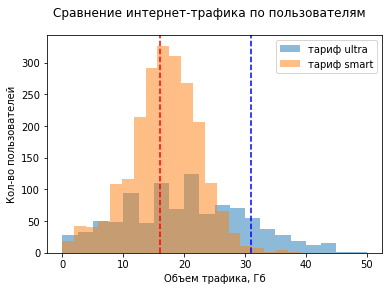

In [108]:
plt.hist(user_stats_revenue_ultra['sum_vol'], bins=20, alpha=0.5, label='тариф ultra')
plt.hist(user_stats_revenue_smart['sum_vol'], bins=20, alpha=0.5, label='тариф smart')
plt.xlabel('Объем трафика, Гб')
plt.ylabel('Кол-во пользователей')
plt.axvline(16, color="red", linestyle="dashed")
plt.axvline(31, color="blue", linestyle="dashed")
plt.legend(loc='upper right')
plt.suptitle('Сравнение интернет-трафика по пользователям')
plt.show()

Заметно нормальное распределение и превышение лимитов обеих категорий пользователей. У пользователей дешевого тарифа лимит приходится на медиану.

**3.1. Общие выводы по разделу:** <a class="anchor" id="third-zero-bullet"></a>
- Из диаграмм видно нормальное распределение категорий;
- Заметно, что для пользователей дешевого тарифа лимит находится как раз на уровне медианы, т.е. пользователи строже следят за своими расходами (а возможно, оператор связи сделал хорошую "домашнюю работу" и точно рассчитал нужды среднего пользователя);
- Лимиты для пользователей дорогого тарифа выглядят неэффективными с точки зрения пользователя - непонятно, зачем переплачивать, т.к. средний пользователь эти лимиты никогда не исчерпывает. 
- Дорогой  тариф имеет смысл подключать при высоком потреблении интернет-трафика (переплата за потребленные гигабайты для дешевого тарифа сравнивает стоимость тарифов), см. по диаграмме: дополнительных 10-15 Гб сверх лимита при стоимости 200 руб за Гб повышают оплату до 2 тыс рублей дополнительно. 
- Предварительно можно сделать вывод, что при двоекратном количестве пользователей дешевого тарифа, если половина пользователей превышает лимиты, то суммарная выручка от обоих тарифов для оператора будет примерно одинакова. Но ведь оператор может зарабатывать еще и дополнительной плате за звонки и сообщения, значит дешевый тариф для оператора более выгоден.

# 4. Проверка гипотез <a class="anchor" id="fourth-bullet"></a>

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задайте самостоятельно.
Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

**Проверим нормальность распределения наших выборок методом Шапиро-Уилка**

Для средней выручки по тарифам:

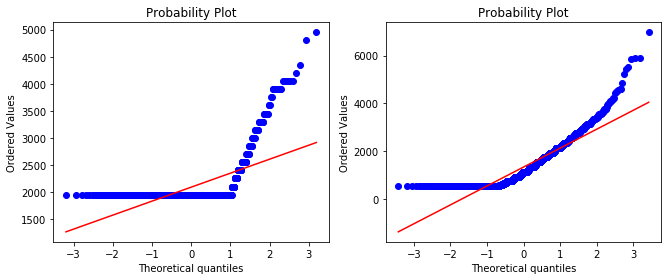

In [109]:
fig = plt.figure(figsize=(14, 4))

data_ultra = user_stats_revenue_ultra['user_revenue']
data_smart = user_stats_revenue_smart['user_revenue']

ax1 = fig.add_subplot(131)
stats.probplot(data_ultra, dist="norm", plot=plt)

ax2 = fig.add_subplot(132)
stats.probplot(data_smart, dist="norm", plot=plt)

fig.tight_layout()
plt.show()

Также проверим распределение по гистограммам. Как видим, это не нормальное распределение:

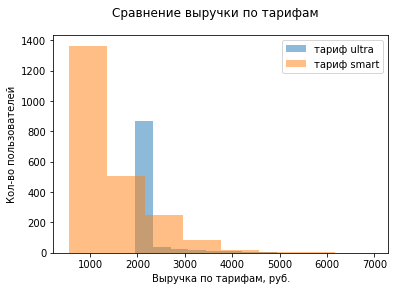

In [110]:
plt.hist(user_stats_revenue_ultra['user_revenue'], bins=8, alpha=0.5, label='тариф ultra')
plt.hist(user_stats_revenue_smart['user_revenue'], bins=8, alpha=0.5, label='тариф smart')
plt.xlabel('Выручка по тарифам, руб.')
plt.ylabel('Кол-во пользователей')
plt.legend(loc='upper right')
plt.suptitle('Сравнение выручки по тарифам')
plt.show()

Для средней выручки по Москве и регионам. Дополнительно понадобится временный датафрейм:

In [111]:
user_stats_revenue_loc = user_stats_revenue.merge(users)
user_stats_revenue_loc = user_stats_revenue_loc[['user_revenue', 'city']]
sample_moscow = user_stats_revenue_loc[user_stats_revenue_loc['city']=='Москва']
sample_region = user_stats_revenue_loc[user_stats_revenue_loc['city']!='Москва']

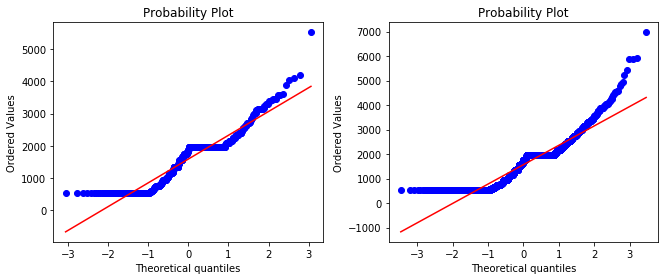

In [112]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
stats.probplot(sample_moscow['user_revenue'], dist="norm", plot=plt)

ax2 = fig.add_subplot(132)
stats.probplot(sample_region['user_revenue'], dist="norm", plot=plt)

fig.tight_layout()
plt.show()

Также проверим распределение по гистограммам. Как видим, это также не нормальное распределение:

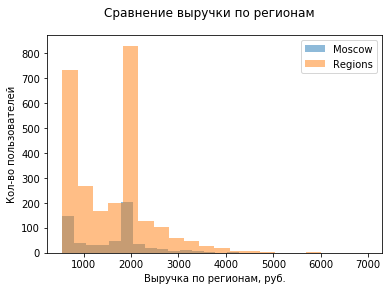

In [113]:
plt.hist(sample_moscow['user_revenue'], bins=20, alpha=0.5, label='Moscow')
plt.hist(sample_region['user_revenue'], bins=20, alpha=0.5, label='Regions')
plt.xlabel('Выручка по регионам, руб.')
plt.ylabel('Кол-во пользователей')
plt.legend(loc='upper right')
plt.suptitle('Сравнение выручки по регионам')
plt.show()

Проверим дисперсии:

In [114]:
variance_ultra = np.var(data_ultra, ddof=1)
variance_smart = np.var(data_smart, ddof=1)
variance_moscow = np.var(sample_moscow['user_revenue'], ddof=1)
variance_regions = np.var(sample_region['user_revenue'], ddof=1)
print("Дисперсия по тарифу ultra:",variance_ultra)
print("Дисперсия по тарифу smart:",variance_smart)
print("--- --- ---")
print("Дисперсия по выручке для Москвы:",variance_moscow)
print("Дисперсия по выручке для регионов:",variance_regions)

Дисперсия по тарифу ultra: 171014.2998638109
Дисперсия по тарифу smart: 731034.518810321
--- --- ---
Дисперсия по выручке для Москвы: 599439.1570389861
Дисперсия по выручке для регионов: 695112.3369156931


**Как видим:**
- дисперсия обеих выборок отличается;
- значения на графиках выборок по тарифам не расположены вдоль прямой, что не позволяет считать оба распределения нормальными.

Исходя из этих условий, чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуемся тестом scipy.stats.ttest_ind.

**Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

- нулевая гипотеза состоит в том, что средняя выручка от пользователей по двум тарифам одинакова, 
- альтернативная гипотеза состоит в том, что выручки будут различаться. 

Используем тест scipy.stats.ttest_ind, с дополнительным условием о разной дисперсии (equal_var = False).

In [115]:
sample_1 = user_stats_revenue_ultra['user_revenue']
sample_2 = user_stats_revenue_smart['user_revenue']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.070850352445897e-208
Отвергаем нулевую гипотезу


Для данного случая отвергаем нулевую гипотезу, средние выручки для пользователей двух тарифов не равны.

**Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

- нулевая гипотеза состоит в том, что средняя выручка от пользователей из Москвы равна средней выручке от пользователей из других регионов;
- альтернативная гипотеза состоит в том, что выручки от пользователей из Москвы и регионов будут различаться.

Используем тест scipy.stats.ttest_ind, с дополнительным условием о разной дисперсии (equal_var = False).

In [116]:
alpha = 0.05

results = st.ttest_ind(sample_moscow['user_revenue'], sample_region['user_revenue'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5846845024565437
Не получилось отвергнуть нулевую гипотезу


На основании результатов теста у нас нет оснований отвергать нулевую гипотезу и приходим к выводу, что средняя выручка по Москве и регионам равна.

Проверка методом mean() или describe() показывает показывает очень похожие значения.

In [117]:
print(sample_moscow['user_revenue'].mean())
print(sample_region['user_revenue'].mean())

1589.430441898527
1570.1148674606225


**4.1. Общие выводы по разделу:** <a class="anchor" id="fourth-zero-bullet"></a>

- мы сформулировали нулевые и альтернативные гипотезы и выбрали критерий для их проверки;
- мы подтвердили, что средние выручки от пользователей тарифов «Ультра» и «Смарт» различаются;
- мы подтвердили, что средняя выручка от пользователей из Москвы не отличается от выручки пользователей из других регионов.

# 5. Общий вывод <a class="anchor" id="fifth-bullet"></a>

Нами проведено исследование по в составе кейса "Определение перспективного тарифа для телеком-компании". В задачи входило выполнить предварительный анализ тарифов на небольшой выборке клиентов.

Нами были изучены данные из разных таблиц и объединены в одну. В результате исследования было обнаружено, что:

- Пользователей дешевого тарифа Smart гораздо больше, чем пользователей тарифа Ultra;
- Пользователи дешевого тарифа больше переплачивают за потребление услуг сверх лимитов (звонки, сообщения, интернет) в среднем;
- Обе категории пользователей сильно переплачивают за интернет. Переплата за интернет сравнивает выручку с пользователя от двух тарифов в среднем, либо даже увеличивает ее для более дешевого тарифа;
- Мы выдвинули гипотезу о том, что средняя выручка с пользователей двух тарифов равна, и после проверки, опровергли ее;
- Мы также выдвинули гипотезу о том, что средняя выручка с пользователей в Москве равна выручке с пользователей в регионах и, после проверки, подтвердили данную гипотезу.

Необходимо провести дополнительное изучение на предмет того, приносит ли потребление сверх лимитов на более дешевом тарифе больше выручки, чем приносит выручка от более дорогого тарифа, но в цели данного исследования это не входило.